In [40]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)
import shap

In [41]:
# load the cleaned and processed data
os.chdir('/Users/jed/Documents/JED/Dataiku/drive-download-20250106T224222Z-001')
!ls
#load the train and test datasets into pandas df
train_data=pd.read_csv('census_income_learn_ready_for_modelling.csv')
train_data.drop('Unnamed: 0', axis=1, inplace=True)
train_data.describe()
train_data.dtypes

#load the train and test datasets into pandas df
test_data=pd.read_csv('census_income_test_ready_for_modelling.csv')
test_data.drop('Unnamed: 0', axis=1, inplace=True)
test_data.describe()
test_data.dtypes

census_income_additional_info.pdf
census_income_learn.csv
census_income_learn_ready_for_modelling.csv
census_income_metadata.txt
census_income_test.csv
census_income_test_ready_for_modelling.csv


TARGET_bin                             int64
Age                                    int64
Male                                   int64
Married                                int64
Race_white                             int64
Education_Grade-school               float64
Education_Graduate                   float64
Education_HS-grad                    float64
Education_HS-nongrad                 float64
Employment_Government                float64
Employment_Not in paid employment    float64
Employment_Private                   float64
Employment_Self-employed             float64
Household_Child                      float64
Household_Householder                float64
Household_Not householder            float64
Parents_birth                          int64
dtype: object

In [42]:
# convert float columns to integers
df=train_data.copy()
df_test=test_data.copy()
float_cols = df.select_dtypes(include='float').columns 
df[float_cols] = df[float_cols].astype(int)  
#rename label col
df = df.rename(columns={'TARGET_bin': 'Label'})

float_cols = df_test.select_dtypes(include='float').columns 
df_test[float_cols] = df_test[float_cols].astype(int)  
#rename label col
df_test = df_test.rename(columns={'TARGET_bin': 'Label'})
df_test.dtypes

Label                                int64
Age                                  int64
Male                                 int64
Married                              int64
Race_white                           int64
Education_Grade-school               int64
Education_Graduate                   int64
Education_HS-grad                    int64
Education_HS-nongrad                 int64
Employment_Government                int64
Employment_Not in paid employment    int64
Employment_Private                   int64
Employment_Self-employed             int64
Household_Child                      int64
Household_Householder                int64
Household_Not householder            int64
Parents_birth                        int64
dtype: object

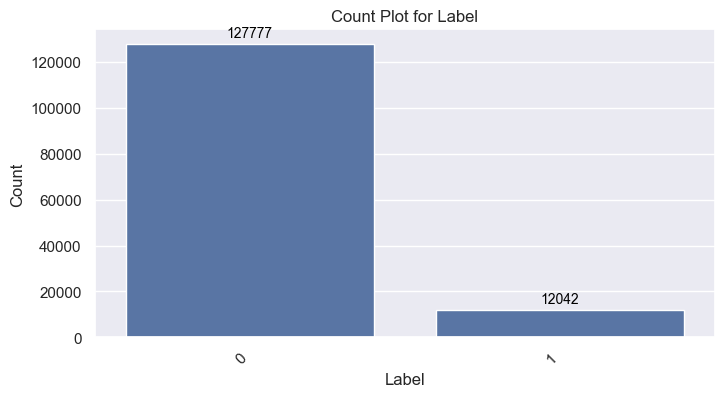

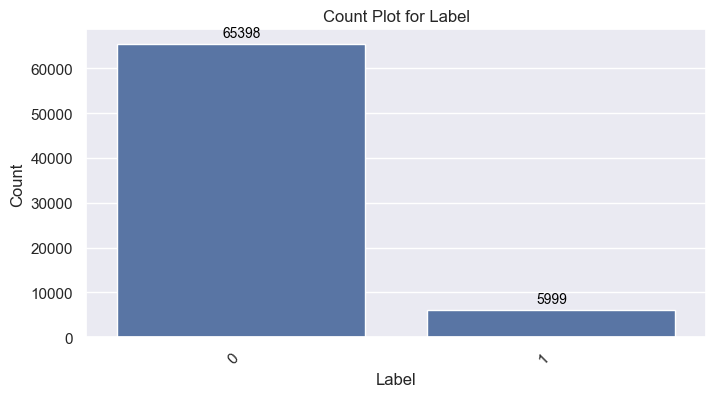

In [43]:
category_counts = df['Label'].value_counts().sort_index()

sns.set()
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='Label', data=df)

# Add counts above the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.title('Count Plot for Label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

category_counts = df_test['Label'].value_counts().sort_index()

sns.set()
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='Label', data=df_test)

# Add counts above the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.title('Count Plot for Label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()




In [44]:
from sklearn.preprocessing import StandardScaler

y_train=df['Label']
X_train=df.drop('Label', axis=1)

y_test=df_test['Label']
X_test=df_test.drop('Label', axis=1)

#Scale Data
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)


In [45]:
print(len(y_test))
print(sum(y_test))

71397
5999


In [46]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import permutation_test_score


RANDOM_STATE = 1903

# a selection of classifiers with defaultt settings 
classifiers = {
    'Logistic Regression':LogisticRegression(max_iter=500),
    'Random Forest': RandomForestClassifier(random_state=RANDOM_STATE),
    'Decision Tree': DecisionTreeClassifier(random_state=RANDOM_STATE),
    'K nearest Neighbour': KNeighborsClassifier(2)
}



In [47]:
len(df_test)

71397

In [48]:
from sklearn.metrics import classification_report, roc_auc_score, f1_score, recall_score, confusion_matrix
classifiers = {
    'Logistic Regression':LogisticRegression(max_iter=500),
    'Random Forest': RandomForestClassifier(random_state=RANDOM_STATE),
    'Decision Tree': DecisionTreeClassifier(random_state=RANDOM_STATE),
    'K nearest Neighbour': KNeighborsClassifier(2)
}

for (name, clf) in classifiers.items():

    print(name,clf)
    clf.fit(X_train_scaled, y_train)

    # Evaluating the score using test data:
    y_pred=clf.predict(X_test_scaled)

    confusion_log = confusion_matrix(y_test, y_pred)
    report_log = classification_report(y_test, y_pred)
    roc_score_log = roc_auc_score(y_test, y_pred)

    print("\nConfusion Matrix:\n", confusion_log)
    print("\nClassification Report:\n\n", report_log)
    print("\nROC-AUC Score:", roc_score_log)


Logistic Regression LogisticRegression(max_iter=500)

Confusion Matrix:
 [[64184  1214]
 [ 4398  1601]]

Classification Report:

               precision    recall  f1-score   support

           0       0.94      0.98      0.96     65398
           1       0.57      0.27      0.36      5999

    accuracy                           0.92     71397
   macro avg       0.75      0.62      0.66     71397
weighted avg       0.91      0.92      0.91     71397


ROC-AUC Score: 0.6241572770767868
Random Forest RandomForestClassifier(random_state=1903)

Confusion Matrix:
 [[63799  1599]
 [ 4148  1851]]

Classification Report:

               precision    recall  f1-score   support

           0       0.94      0.98      0.96     65398
           1       0.54      0.31      0.39      5999

    accuracy                           0.92     71397
   macro avg       0.74      0.64      0.67     71397
weighted avg       0.91      0.92      0.91     71397


ROC-AUC Score: 0.642050568118938
Decision Tree 

In [49]:
# add class_weight='balanced' param to the models that have that function

classifiers = {
    'Logistic Regression':LogisticRegression(max_iter=500, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(random_state=RANDOM_STATE, class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(random_state=RANDOM_STATE, class_weight='balanced'),
}


for (name, clf) in classifiers.items():

    print(name,clf)
    clf.fit(X_train_scaled, y_train)

    # Evaluating the score using test data:
    y_pred=clf.predict(X_test_scaled)

    confusion_log = confusion_matrix(y_test, y_pred)
    report_log = classification_report(y_test, y_pred)
    roc_score_log = roc_auc_score(y_test, y_pred)

    print("\nConfusion Matrix:\n", confusion_log)
    print("\nClassification Report:\n\n", report_log)
    print("\nROC-AUC Score:", roc_score_log)


Logistic Regression LogisticRegression(class_weight='balanced', max_iter=500)

Confusion Matrix:
 [[48957 16441]
 [  679  5320]]

Classification Report:

               precision    recall  f1-score   support

           0       0.99      0.75      0.85     65398
           1       0.24      0.89      0.38      5999

    accuracy                           0.76     71397
   macro avg       0.62      0.82      0.62     71397
weighted avg       0.92      0.76      0.81     71397


ROC-AUC Score: 0.8177076718613321
Random Forest RandomForestClassifier(class_weight='balanced', random_state=1903)

Confusion Matrix:
 [[53828 11570]
 [ 1447  4552]]

Classification Report:

               precision    recall  f1-score   support

           0       0.97      0.82      0.89     65398
           1       0.28      0.76      0.41      5999

    accuracy                           0.82     71397
   macro avg       0.63      0.79      0.65     71397
weighted avg       0.92      0.82      0.85     71397

In [11]:
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(class_weight='balanced'),
    n_estimators=50,
    max_samples=1.0,
    bootstrap=True,
    random_state=42,
)
model.fit(X_train_scaled, y_train)
y_pred=model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.98      0.81      0.88     65398
           1       0.27      0.79      0.41      5999

    accuracy                           0.81     71397
   macro avg       0.63      0.80      0.65     71397
weighted avg       0.92      0.81      0.84     71397



[[52049 13349]
 [ 1088  4911]]
              precision    recall  f1-score   support

           0       0.98      0.80      0.88     65398
           1       0.27      0.82      0.40      5999

    accuracy                           0.80     71397
   macro avg       0.62      0.81      0.64     71397
weighted avg       0.92      0.80      0.84     71397

0.8072585236881151
-0.024449206549294833 Employment_Private
-0.02306819614269511 Education_HS-grad
-0.021678782021653565 Employment_Not in paid employment
-0.011641945740017113 Employment_Government
-0.009025589310475235 Employment_Self-employed
-0.007781839573091332 Education_HS-nongrad
-0.005885401347395592 Education_Grade-school
-0.004848943232908987 Married
-0.0026807849069288904 Parents_birth
-0.002325027662226775 Race_white
0.00786307547936187 Education_Graduate
0.010020028852752882 Age
0.010837990391753127 Male


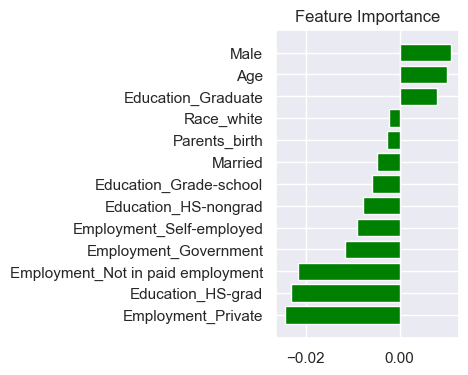

In [16]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import permutation_test_score
from sklearn.inspection import permutation_importance

voting_model = VotingClassifier(estimators=[
    ('lr', LogisticRegression(class_weight='balanced')),
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=RANDOM_STATE)),
    ('dt', DecisionTreeClassifier(random_state=RANDOM_STATE, class_weight='balanced'))
], voting='soft')

voting_model.fit(X_train_scaled, y_train)
y_pred=voting_model.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

result = permutation_importance(voting_model, X_test_scaled, y_test, n_repeats=5, random_state=RANDOM_STATE)
pd.DataFrame(
        {
            k: result[k]
            for k in (
                "importances_mean",
                "importances_std",
            )
        },
        index=X_test.columns,
    ).sort_values(by="importances_mean", ascending=False)


feature_importance = result.importances_mean
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(8, 4))
plt.subplot(1, 3, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center",color='green')
plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
plt.title("Feature Importance")

for i in range(0,len(sorted_idx)):
    print(feature_importance[sorted_idx[i]], np.array(X_train.columns)[sorted_idx[i]])

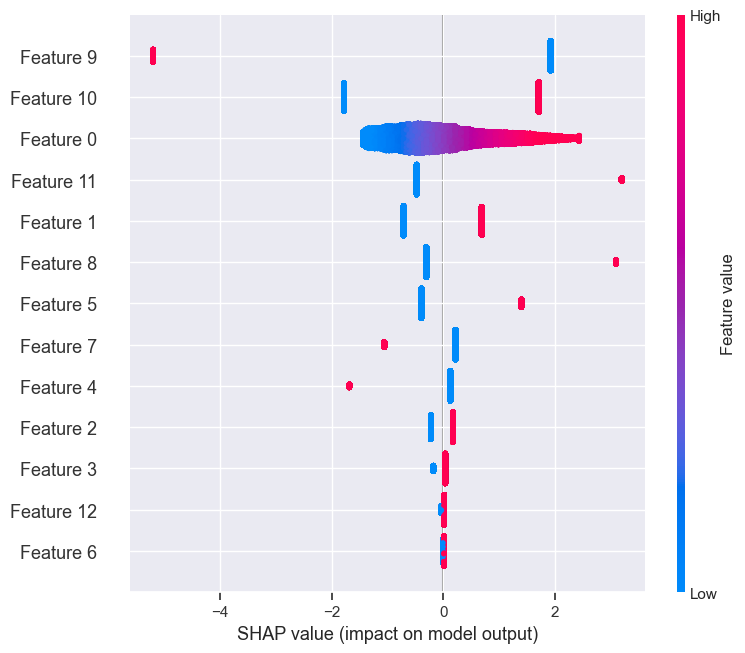

In [23]:
# Train model
model = LogisticRegression(class_weight='balanced')
model.fit(X_train_scaled, y_train)

# Explain model predictions
explainer = shap.Explainer(model, X_train_scaled)
shap_values = explainer(X_train_scaled)

# Plot summary
shap.summary_plot(shap_values, X_train_scaled)

In [21]:
shap_values.values[1]

array([[-0.05515445,  0.05515444],
       [-0.1185891 ,  0.1185891 ],
       [ 0.10210309, -0.10210309],
       [-0.00057562,  0.00057562],
       [-0.0013572 ,  0.0013572 ],
       [ 0.04605755, -0.04605755],
       [-0.09463909,  0.09463909],
       [ 0.00046349, -0.00046349],
       [-0.00044777,  0.00044777],
       [-0.10552267,  0.10552267],
       [ 0.01017555, -0.01017554],
       [ 0.06564048, -0.0656405 ],
       [-0.02859885,  0.02859885]])

In [15]:
shap.summary_plot(shap_values[1], X_train_scaled, plot_type="bar", color="blue")


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

0.4051430517711172
              precision    recall  f1-score   support

           0       0.98      0.81      0.88     65398
           1       0.27      0.79      0.41      5999

    accuracy                           0.80     71397
   macro avg       0.62      0.80      0.64     71397
weighted avg       0.92      0.80      0.84     71397



Text(0.5, 1.0, 'Feature Importance')

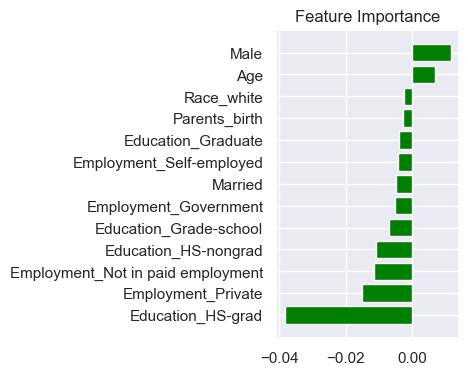

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, f1_score, recall_score
from sklearn.inspection import permutation_importance

random_state=1903

clf=RandomForestClassifier(class_weight = "balanced")
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
f1 = f1_score(y_test, y_pred, average='binary')
print(f1)
print(classification_report(y_test, y_pred))

result = permutation_importance(clf, X_test, y_test, n_repeats=5, random_state=1903)
pd.DataFrame(
        {
            k: result[k]
            for k in (
                "importances_mean",
                "importances_std",
            )
        },
        index=X_test.columns,
    ).sort_values(by="importances_mean", ascending=False)


feature_importance = result.importances_mean
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(8, 4))
plt.subplot(1, 3, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center",color='green')
plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title("Feature Importance")



In [67]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=50,
    max_samples=1.0,
    bootstrap=True,
    random_state=42,
)
model.fit(X_train_balanced, y_train_balanced)
y_test=model.predict(X_test)
print(classification_report(y_test, y_pred))



/usr/local/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  self.estimator_ = default
/usr/local/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  feature names of data provided when reset was last True.


              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96     50755
         1.0       0.96      0.81      0.88     20642

    accuracy                           0.93     71397
   macro avg       0.94      0.90      0.92     71397
weighted avg       0.94      0.93      0.93     71397



In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, f1_score, recall_score
from sklearn.inspection import permutation_importance

random_state=1903

#these are the classifiers we are testing, I have added a couple others too
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=random_state)
}

f1_scores=[]

clf=RandomForestClassifier(class_weight = "balanced")
stratify_feature=y
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1903)
for train_index, test_index in skf.split(X, stratify_feature):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    true_event_count = np.sum(y_train)
    #print('no. of training events for fold', d, '=', true_event_count)
    true_event_count = np.sum(y_test)
    #print('no. of test events for fold', d, '=', true_event_count)
    


    
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    
    f1 = f1_score(y_test, y_pred, average='binary')
    f1_scores.append(f1)

print(f1_scores)

[0.40845374164330384, 0.3963123644251627, 0.4034588441330999, 0.4018324607329843, 0.40803315269365636]


In [ ]:
from sklearn.utils import resample

# Separate majority and minority classes
majority = X_train[y_train == 0]
minority = X_train[y_train == 1]

# Downsample majority class
majority_downsampled = resample(majority, replace=False, n_samples=len(minority), random_state=42)

# Combine with minority class
X_train_balanced = np.vstack((majority_downsampled, minority))
y_train_balanced = np.hstack((np.zeros(len(minority)), np.ones(len(minority))))


In [49]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=50,
    max_samples=1.0,
    bootstrap=True,
    random_state=42,
)
model.fit(X_train_balanced, y_train_balanced)


ModuleNotFoundError: No module named 'imbalanced_learn'

In [50]:
from imblearn.over_sampling import RandomOverSampler

ImportError: cannot import name '_fit_context' from 'sklearn.base' (/usr/local/lib/python3.11/site-packages/sklearn/base.py)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

ImportError: cannot import name 'UnsetMetadataPassedError' from 'sklearn.exceptions' (/usr/local/lib/python3.11/site-packages/sklearn/exceptions.py)

In [42]:
import sklearn
print(sklearn.__version__)

1.2.2
